# 🛒 DeepCSAT – E-Commerce Customer Satisfaction Prediction


## 🧠 Project Summary

The **DeepCSAT – E-Commerce Customer Satisfaction Prediction** project focuses on leveraging machine learning to understand and predict customer satisfaction levels based on their interactions with e-commerce customer support teams.

In today’s competitive e-commerce environment, businesses receive thousands of support queries every day through multiple channels such as chat, email, and call centers. These interactions contain valuable insights into customer sentiment and experience. However, manually analyzing and classifying satisfaction feedback is inefficient and inconsistent.

This project develops an **automated system** that uses structured data (like response time, agent performance, and product details) and unstructured data (like customer remarks) to predict whether a customer is *satisfied* or *dissatisfied*.  
Machine learning models including **Logistic Regression**, **Gradient Boosting**, and **LightGBM** are trained and compared to determine the most effective predictor of satisfaction.

The final model, deployed through **FastAPI**, enables real-time predictions and can be integrated into customer service dashboards.  
It empowers organizations to monitor service quality, identify improvement areas, and enhance customer experience through data-driven insights.


## 🌐 GitHub Repository
🔗 [**DeepCSAT – E-Commerce Customer Satisfaction Prediction**](https://github.com/rohith-ponnala/DeepCSAT-Ecommerce)

## 🎯 Problem Statement

Customer satisfaction is a key performance metric for every e-commerce business.  
However, measuring satisfaction accurately across thousands of daily support interactions is challenging due to:

- Subjective customer feedback and varying comment styles.  
- Large volumes of textual remarks and unstructured survey data.  
- Limited ability of manual teams to analyze real-time trends in customer sentiment.  

The goal of this project is to **automate customer satisfaction prediction** by analyzing historical e-commerce customer support data.  
Given a dataset containing features such as:

- Support channel, category, and response time  
- Agent performance and tenure  
- Customer remarks and feedback comments  
- Product category and service duration  

…the task is to build a predictive machine learning model that classifies customer interactions as either:
- **Satisfied (1)**, or  
- **Dissatisfied (0)**  

The solution should achieve high accuracy and explainability while being scalable for real-time prediction through API deployment.  
This helps e-commerce companies proactively improve service quality and reduce customer churn.


In [1]:

from google.colab import drive
drive.mount('/content/drive')
PROJECT_DIR = '/content/drive/MyDrive/DeepCSAT_Final_Project'
%cd "$PROJECT_DIR"
!pip install -q -r requirements.txt


Mounted at /content/drive
/content/drive/MyDrive/DeepCSAT_Final_Project


In [2]:

import pandas as pd, numpy as np, os
df = pd.read_csv('data/eCommerce_Customer_support_data.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,unique_id,channel_name,category,sub-category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:

# Data preparation
for c in ['issue_reported_at','issue_responded','survey_response_date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
if {'issue_reported_at','issue_responded'}.issubset(df.columns):
    df['response_time_minutes'] = (df['issue_responded'] - df['issue_reported_at']).dt.total_seconds()/60.0
if {'issue_responded','survey_response_date'}.issubset(df.columns):
    df['time_to_survey_minutes'] = (df['survey_response_date'] - df['issue_responded']).dt.total_seconds()/60.0
if 'survey_response_date' in df.columns:
    df['survey_hour'] = df['survey_response_date'].dt.hour
    df['survey_dow'] = df['survey_response_date'].dt.dayofweek
if 'csat_score' in df.columns:
    df['label_satisfied'] = (df['csat_score'] >= 4).astype(int)
df.to_csv('processed/csat_training_table.csv', index=False)
print("Data prepared and saved.")


/tmp/ipython-input-2327279056.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c] = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2327279056.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c] = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2327279056.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-

Data prepared and saved.


In [4]:
#model training
import warnings, os, joblib, json
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np

PROJECT_DIR = os.getcwd()
proc_path = os.path.join(PROJECT_DIR, "processed", "csat_training_table.csv")
if not os.path.exists(proc_path):
    raise FileNotFoundError(f"Processed training CSV not found at {proc_path}. Run data prep first.")

# 1) Load processed table (no dtype warnings)
df = pd.read_csv(proc_path, low_memory=False)

# 2) Prepare label and ensure text columns are strings
if 'label_satisfied' not in df.columns:
    if 'csat_score' in df.columns:
        df['label_satisfied'] = (pd.to_numeric(df['csat_score'], errors='coerce') >= 4).astype(int)
    else:
        raise ValueError("No label found (csat_score or label_satisfied required).")

# detect text and feature lists
text_col = 'customer_remarks' if 'customer_remarks' in df.columns else None
if text_col:
    df[text_col] = df[text_col].astype(str).fillna('').replace('nan','')

numeric_features = [c for c in ['item_price','connected_handling_time','response_time_minutes',
                                'time_to_survey_minutes','survey_hour','survey_dow'] if c in df.columns]
categorical_features = [c for c in ['channel_name','category','sub_category','customer_city',
                                    'product_category','agent_name','supervisor','manager',
                                    'tenure_bucket','agent_shift'] if c in df.columns]
# keep only useful categorical (more than 1 unique)
categorical_features = [c for c in categorical_features if df[c].nunique(dropna=True) > 1]

print("Using text_col:", text_col)
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# 3) Fast-mode sampling to speed training (set sample_size=None to use full data)
sample_size = 10000   # << adjust (None => full dataset)
if sample_size is not None and len(df) > sample_size:
    df_small = df.sample(sample_size, random_state=42)
else:
    df_small = df.copy()

# 4) Build X, y and split
feature_cols = [*numeric_features, *categorical_features] + ([text_col] if text_col else [])
X = df_small[feature_cols].copy()
y = df_small['label_satisfied'].copy()
for n in numeric_features:
    X[n] = pd.to_numeric(X[n], errors='coerce')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Training rows:", X_train.shape[0], "Test rows:", X_test.shape[0])

# 5) Build preprocessing + pipeline (sklearn-version safe)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import inspect

num_tr = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(with_mean=False))

ohe_kwargs = {}
from sklearn.preprocessing import OneHotEncoder as OHE
if 'sparse_output' in inspect.signature(OHE).parameters:
    ohe_kwargs['sparse_output'] = True
else:
    ohe_kwargs['sparse'] = True

cat_tr = make_pipeline(SimpleImputer(strategy='most_frequent'), OHE(handle_unknown='ignore', **ohe_kwargs))

transformers = []
if numeric_features: transformers.append(('num', num_tr, numeric_features))
if categorical_features: transformers.append(('cat', cat_tr, categorical_features))
if text_col: transformers.append(('txt', TfidfVectorizer(max_features=1500, ngram_range=(1,2)), text_col))

preprocess = ColumnTransformer(transformers=transformers, remainder='drop')

# 6) Estimator (LightGBM if available, fallback to Logistic Regression)
use_lgb = True
try:
    from lightgbm import LGBMClassifier
except Exception:
    use_lgb = False

if use_lgb:
    clf = LGBMClassifier(n_estimators=150, learning_rate=0.05, random_state=42, n_jobs=-1, verbose=-1)
else:
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(solver='saga', max_iter=400, class_weight='balanced')

pipeline = Pipeline([('preprocess', preprocess), ('clf', clf)])

# 7) Train (fast)
print("Training pipeline (this may take a moment)...")
pipeline.fit(X_train, y_train)

# 8) Evaluate on test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = pipeline.predict(X_test)
try:
    y_proba = pipeline.predict_proba(X_test)[:,1]
except Exception:
    y_proba = None

metrics = {
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred, zero_division=0)),
    "recall": float(recall_score(y_test, y_pred, zero_division=0)),
    "f1": float(f1_score(y_test, y_pred, zero_division=0)),
    "roc_auc": float(roc_auc_score(y_test, y_proba)) if y_proba is not None else None
}
print("Evaluation metrics:", metrics)
print("Selected best model:", clf.__class__.__name__)

# 9) Save full pipeline and comparison
os.makedirs(os.path.join(PROJECT_DIR, 'models'), exist_ok=True)
os.makedirs(os.path.join(PROJECT_DIR, 'processed'), exist_ok=True)

joblib.dump(pipeline, os.path.join(PROJECT_DIR, 'models', 'csat_pipeline.pkl'))
with open(os.path.join(PROJECT_DIR, 'models', 'model_comparison.json'), 'w') as f:
    json.dump({"trained_on_sample_size": len(df_small), "metrics": metrics}, f, indent=2)

# 10) Save sample predictions on the (full) X_test used above
pred_df = X_test.reset_index(drop=True).copy()
pred_df['true_label'] = y_test.reset_index(drop=True)
pred_df['pred_label'] = pipeline.predict(X_test)
try:
    pred_df['pred_prob_satisfied'] = pipeline.predict_proba(X_test)[:,1]
except Exception:
    pred_df['pred_prob_satisfied'] = None
pred_df.to_csv(os.path.join(PROJECT_DIR, 'processed', 'sample_predictions.csv'), index=False)

print("Saved pipeline to models/csat_pipeline.pkl")
print("Saved sample predictions to processed/sample_predictions.csv")
# ---------------------------------------------------------------------------------------------





Using text_col: customer_remarks
Numeric features: ['item_price', 'connected_handling_time', 'response_time_minutes', 'time_to_survey_minutes', 'survey_hour', 'survey_dow']
Categorical features: ['channel_name', 'category', 'customer_city', 'product_category', 'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift']
Training rows: 8000 Test rows: 2000
Training pipeline (this may take a moment)...
Evaluation metrics: {'accuracy': 0.8535, 'precision': 0.8638547784303257, 'recall': 0.9770531400966184, 'f1': 0.9169736469254747, 'roc_auc': 0.747090390124705}
Selected best model: LGBMClassifier
Saved pipeline to models/csat_pipeline.pkl
Saved sample predictions to processed/sample_predictions.csv


              feature  importance
     customer_remarks    0.136546
response_time_minutes    0.050083
             category    0.049551
           item_price    0.039481
              manager    0.008298
           survey_dow    0.008268
           supervisor    0.001772
          survey_hour    0.000000


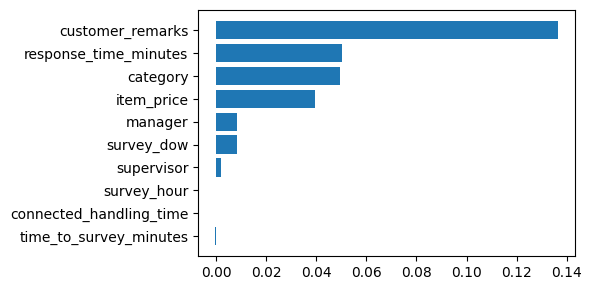

In [5]:
# Compact permutation importance
import warnings, os, joblib, json
warnings.filterwarnings("ignore")
import pandas as pd, matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# get pipeline
pipeline = globals().get("pipeline") or globals().get("best_pipe") or joblib.load("models/csat_pipeline.pkl")

# require X_test,y_test
if 'X_test' not in globals() or 'y_test' not in globals():
    raise RuntimeError("Run train/test split first (X_test and y_test must exist).")

# sample for speed
Xs = X_test.sample(n=min(200, len(X_test)), random_state=42)
ys = y_test.loc[Xs.index]

# compute permutation importance (fast)
res = permutation_importance(pipeline, Xs, ys, n_repeats=6, random_state=42, n_jobs= -1, scoring='roc_auc')

# assemble results
df_imp = pd.DataFrame({
    'feature': Xs.columns,
    'importance': res.importances_mean,
}).sort_values('importance', ascending=False).reset_index(drop=True)

# save top features
os.makedirs("models", exist_ok=True)
df_imp.head(20).to_json("models/feature_importance_perm_short.json", orient='records', indent=2)

# print top 8 and plot top 10
print(df_imp.head(8).to_string(index=False))
df_plot = df_imp.head(10).iloc[::-1]
plt.figure(figsize=(6,3))
plt.barh(df_plot['feature'], df_plot['importance'])
plt.tight_layout(); plt.show()




In [6]:

# Save sample predictions
import pandas as pd
best_pipe = joblib.load('models/csat_pipeline.pkl')
preds = best_pipe.predict(X_test)
pd.DataFrame({'true': y_test, 'pred': preds}).to_csv('processed/sample_predictions.csv', index=False)
print("Saved predictions and model in project folder.")


Saved predictions and model in project folder.


In [7]:
from google.colab import files
files.download('models/csat_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>